<a href="https://colab.research.google.com/github/amarkotha00/Data-Science-Training/blob/main/01_Normalization_and_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Age, Money(lakhs), Happiness
# 10 , 0 ,   1
# 50 , 1000, 0
# 25 , 500, 0
# 35 , 650, 1
# order of Age-> 1,5,2.5,3.5 X 10^1-> Order 1
# order of Money-> 0, 1, 0.5, 0.65 X 10^8-> order 8
# order of Happiness-> 0,1 X 10^0-> Order 0
# The order is NOT same!
# Some columns hold values that are MUCH larger or smaller than 
# other columns!

In [ ]:
# ML is y = mx + c
# m is weights, c is bias
# y = happiness = f(x1,x2) = weights * (Age,Money) + bias
# Happiness = w1*Age + w2*Money +bias 
# doesn't matter what Age's value is, Money is a large number
# and will always dominate the equation!

In [ ]:
# Central Limit Theorem 
# mean (centre of the circle), standard_deviation (radius of the circle)
# most points -> lesser length than standard deviation (inside the circle)
# some points-> can be > len(std), (on the circumference or just outside up to 2x STD)
# outliers-> distance from mean > 3 times the standard deviation!!!

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv')

In [17]:
data.head()
data = data.iloc[:, :-1] # letting go for Unnamed: 32 columns
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [18]:
# ALL the data in the SAME SCALE- RATIO should be PRESERVED!

In [19]:
# MinMax-> Make min number as 0, max number as 1, and scale
# everything in between 0 to 1

# Z-Score-> Make the mean as 0, standard deviation as our tolerance
# distance of any point(x) to mean-> x-mean
# if i were to divide this distance by std:
# for normal points => -1 < (x-mean)/std < 1
# for normal points up to outlier=> -3< (x-Mean)/std < 3
# for outliers=> -3> (x-mean)/std > 3

In [20]:
#MinMax -> Scale -> [0,1]
# formulae: for any dataset x, minmax = (x-min)/(max-min)
# for example, take pixels-> R,G,B
# (200,100,50) -> assume min (0,5,5) and max (200,200,200) from dataset
# (200-0, 100-5, 50-5) / (200-0, 200-5, 200-5)
# (200,95,45)/ (200, 195, 195)
# (1, 0.487, 0.231 )
# pictures, colors-> use MinMax

In [21]:
# y = w1*r + w2*b + w3*g + bias
# r,g,b -> diff scales-> g (0,10) r(0,200) b (50,150)

In [22]:
stats = data.describe().T
minmax_min = stats['min']
minmax_max = stats['max']

In [23]:
scaled_minmax_dataset = (data-minmax_min)/(minmax_max - minmax_min)
scaled_minmax_dataset.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,concavity_se,concavity_worst,diagnosis,fractal_dimension_mean,fractal_dimension_se,id,perimeter_mean,perimeter_se,perimeter_worst,radius_mean,radius_se,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,0.363733,0.273811,0.450698,0.792037,0.351398,0.619292,0.731113,0.300625,0.912027,0.703140,0.135682,0.568610,NaN,0.605518,0.183042,0.000915,0.545989,0.369034,0.668310,0.521037,0.356147,0.620776,0.593753,0.159296,0.601136,0.686364,0.311645,0.598462,0.022658,0.120469,0.141525
1,0.501591,0.125660,0.435214,0.181768,0.081323,0.154563,0.348757,0.253836,0.639175,0.203608,0.046970,0.192971,NaN,0.141323,0.091110,0.000915,0.615783,0.124440,0.539818,0.643144,0.156437,0.606901,0.289880,0.119387,0.347553,0.379798,0.084539,0.233590,0.272574,0.082589,0.303571
2,0.449417,0.162922,0.374508,0.431017,0.283955,0.385375,0.635686,0.389847,0.835052,0.462512,0.096768,0.359744,NaN,0.211247,0.127006,0.092495,0.595743,0.180370,0.508442,0.601496,0.229622,0.556386,0.514309,0.150831,0.483590,0.509596,0.205690,0.403706,0.390260,0.094303,0.360075
3,0.102906,0.038155,0.094008,0.811361,0.543215,0.814012,0.522863,0.353665,0.884880,0.565604,0.142955,0.548642,NaN,1.000000,0.287205,0.092547,0.233501,0.126655,0.241347,0.210090,0.139091,0.248310,0.811321,0.251453,0.915472,0.776263,0.728148,1.000000,0.360839,0.175875,0.385928
4,0.489290,0.163688,0.341575,0.347893,0.167918,0.172415,0.518390,0.357075,0.558419,0.463918,0.143636,0.319489,NaN,0.186816,0.145800,0.092559,0.630986,0.220563,0.506948,0.629893,0.233822,0.519744,0.430351,0.332359,0.437364,0.378283,0.136179,0.157500,0.156578,0.093065,0.123934


In [24]:
minmax_max, minmax_min

(id                        9.113205e+08
 radius_mean               2.811000e+01
 texture_mean              3.928000e+01
 perimeter_mean            1.885000e+02
 area_mean                 2.501000e+03
 smoothness_mean           1.634000e-01
 compactness_mean          3.454000e-01
 concavity_mean            4.268000e-01
 concave points_mean       2.012000e-01
 symmetry_mean             3.040000e-01
 fractal_dimension_mean    9.744000e-02
 radius_se                 2.873000e+00
 texture_se                4.885000e+00
 perimeter_se              2.198000e+01
 area_se                   5.422000e+02
 smoothness_se             3.113000e-02
 compactness_se            1.354000e-01
 concavity_se              3.960000e-01
 concave points_se         5.279000e-02
 symmetry_se               7.895000e-02
 fractal_dimension_se      2.984000e-02
 radius_worst              3.604000e+01
 texture_worst             4.954000e+01
 perimeter_worst           2.512000e+02
 area_worst                4.254000e+03


In [25]:
# Z-scoring-> scales data, additionally help detect outliers

In [26]:
# formulae-> distance from mean/std
# -> (x-mean)/std
# scale-> -inf to + inf with mean set to 0!
# all values below -3 and above 3 are outliers
# after removing outliers, the scale-> (-3,3)

In [27]:
# methodology:
# take assumptions from training dataset, apply those assumptions to the testing
# dataset
# assumptions-> mean, std, min, max

In [28]:
y = data.loc[:, 'diagnosis'] # loc-> location name
x = data.iloc[:, 2:12] # iloc-> index of location

In [29]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [30]:
# divide the data between 2 datasets
# first dataset (training) > second dataset (Scoring or testing)
# testing dataset should not contain any new use cases!

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
#get the assumptions from training data (xtrain)
# assumptions-> mean,std
stats = xtrain.describe().T
zmean = stats['mean']
zstd = stats['std']

In [33]:
# Apply the assumptions to both TRAINING and TESTING data
# z-score -> (data-mean)/std
xtrain_norm = (xtrain - zmean)/zstd
xtest_norm = (xtest - zmean)/zstd

# if the group says their fav color is blue
# and if i were to divide that group into 2
# those subgroups should also tell their fav color is blue!

In [34]:
# zscore-> mean is assumed 0, and all other values are scaled with respect to 
# mean and std
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
68,-1.439169,-0.434841,-1.360587,-1.137865,0.779715,0.718131,2.820030,-0.119019,1.091461,2.455470
181,1.971926,1.731120,2.089372,1.849937,1.318392,3.422508,2.010899,2.662102,2.124665,1.556682
63,-1.398443,-1.248248,-1.343730,-1.108565,-1.331180,-0.307017,-0.365156,-0.695736,1.928211,0.953329
248,-0.980717,1.414665,-0.981507,-0.865991,0.059325,-0.596132,-0.819301,-0.844186,0.312920,0.073960
60,-1.116471,-1.009149,-1.123765,-0.964880,1.268115,-0.438519,-0.982260,-0.929577,3.390704,0.949168


In [35]:
# total outliers per column!
xtrain_norm[xtrain_norm > 3].count() + xtrain_norm[xtrain_norm < -3].count()

radius_mean               4
texture_mean              4
perimeter_mean            6
area_mean                 7
smoothness_mean           5
compactness_mean          6
concavity_mean            6
concave points_mean       5
symmetry_mean             4
fractal_dimension_mean    7
dtype: int64

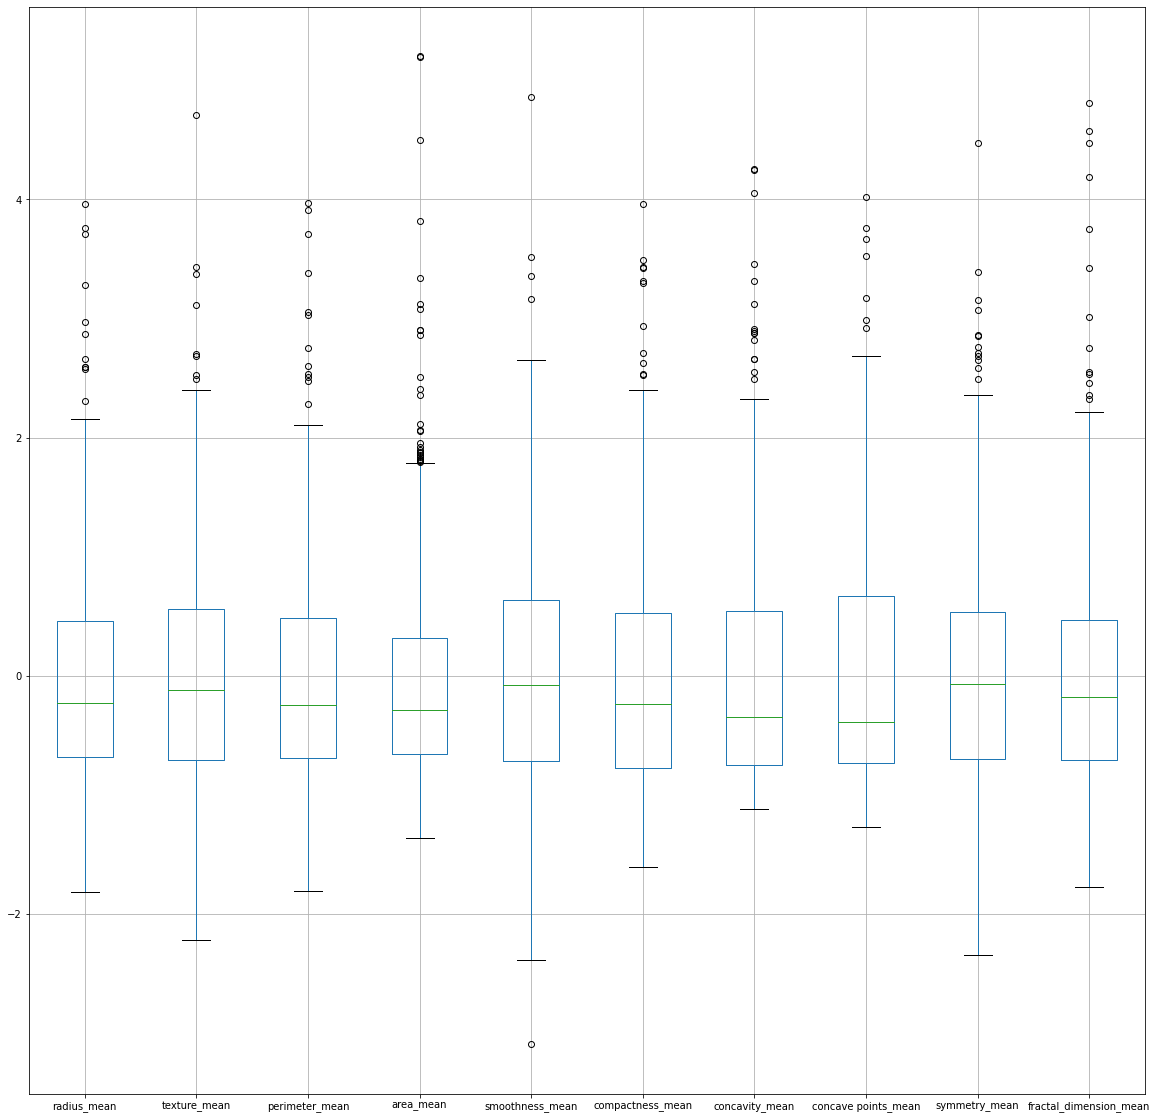

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
xtrain_norm.boxplot()
plt.savefig('boxplot.png')
plt.show()